# Medicare.Gov Data Exploration
#### Objectives:
1. Connect to Socrata Open Data API (SODA)
    - Post-Acute Facilties: 
        - https://data.medicare.gov/Nursing-Home-Compare/Provider-Info/4pq5-n9py
    - Penalties or fines: 
        - https://data.medicare.gov/Nursing-Home-Compare/Penalties/g6vv-u9sr
    - Long Term Care Minimum Data's quality Measures:
        - https://data.medicare.gov/Nursing-Home-Compare/MDS-Quality-Measures/djen-97ju
    - Center for Medicare and Medicaid Services Star Rating: 
        - https://data.medicare.gov/Nursing-Home-Compare/Star-Ratings/ax9d-vq6k
    
2. Run initial exploratory data analysis and ask the following questions:
    1. What are some frequency counts of interest?
    2. What are some trends that show high, low, increases, decreases, or outliers?
    3. What do histograms display?
    4. What are some quantities to compare?
    5. What scatter plots are interesting?
    6. What time of time series data trends are interesting?
3. What are some initial hypotheses or insights? What should I investigate next?
4. Data presentation
    - What are some ways to narrate this data?
    - What additional data do I need to make this story more complete?


## Setting up
- Load libraries
- set paths
- read data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

# Read Provider
info = 'https://data.medicare.gov/resource/b27b-2uc7.json?$select='
info_cols = pd.Series([
    'federal_provider_number','provider_name','provider_state','provider_city','ownership_type',
    'number_of_certified_beds','number_of_residents_in_certified_beds','overall_rating','total_weighted_health_survey_score',
    'number_of_substantiated_complaints', 'number_of_fines', 'total_amount_of_fines_in_dollars',
    'number_of_payment_denials', 'total_number_of_penalties']).str.cat(sep = ',')
info = pd.read_json(info+info_cols).set_index('federal_provider_number').sort_index()

# Read Penalty
fines = 'https://data.medicare.gov/resource/im9k-ugyp.json?$select='
fines_cols = pd.Series(['federal_provider_number','penalty_date','penalty_type','fine_amount']).str.cat(sep = ',')
fines = pd.read_json(fines+fines_cols).set_index('federal_provider_number').sort_index()

# Read MDS
mds = 'https://data.medicare.gov/resource/adup-8cbx.json?$select='
mds_cols = pd.Series([
    'federal_provider_number',
    'measure_code',
    'measure_description','resident_type',
    'three_quarter_average']).str.cat(sep = ',')
mds = pd.read_json(mds + mds_cols).set_index('federal_provider_number').sort_index()

# Read Star
star = 'https://data.medicare.gov/resource/ax9d-vq6k.json?$select='
star_cols = pd.Series(['federal_provider_number','health_inspection_rating','qm_rating','staffing_rating','rn_staffing_rating']).str.cat(sep = ',')
star = pd.read_json(star+star_cols).set_index('federal_provider_number').sort_index()


C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


#### column_selection



In [2]:
info.occupancy_rate = info.number_of_residents_in_certified_beds/info.number_of_certified_beds

In [3]:
info.head()

,number_of_certified_beds,number_of_fines,number_of_payment_denials,number_of_residents_in_certified_beds,number_of_substantiated_complaints,overall_rating,ownership_type,provider_city,provider_name,provider_state,total_amount_of_fines_in_dollars,total_number_of_penalties,total_weighted_health_survey_score
federal_provider_number,,,,,,,,,,,,,
015014,92,0,0,82,1,2.0,For profit - Corporation,BIRMINGHAM,EASTVIEW REHABILITATION & HEALTHCARE CENTER,AL,0,0,36.000
015016,149,0,0,126,1,4.0,For profit - Corporation,ATHENS,ATHENS HEALTH AND REHABILITATION LLC,AL,0,0,33.333
015034,78,0,0,68,0,3.0,For profit - Corporation,NORTHPORT,"HUNTER CREEK HEALTH AND REHABILITATION, LLC",AL,0,0,32.000
015044,64,0,0,54,0,5.0,For profit - Corporation,PLEASANT GROVE,"CAREGIVERS OF PLEASANT GROVE, INC",AL,0,0,16.000
015076,197,0,0,184,2,1.0,Non profit - Other,BIRMINGHAM,FAIR HAVEN,AL,0,0,70.000


In [4]:
owner_rating = pd.crosstab(
    info.ownership_type,
    info.overall_rating,
    normalize = 'index' ) # "index" for rows, 'columns' for columns

owner_rating



overall_rating,1.0,2.0,3.0,4.0,5.0
ownership_type,,,,,
For profit - Corporation,0.170772,0.206897,0.182266,0.236453,0.203612
For profit - Individual,0.102041,0.306122,0.183673,0.183673,0.224490
For profit - Limited Liability company,0.333333,0.444444,0.000000,0.111111,0.111111
For profit - Partnership,0.169492,0.254237,0.169492,0.203390,0.203390
Government - City,0.200000,0.200000,0.000000,0.200000,0.400000
Government - City/county,0.000000,0.000000,0.000000,1.000000,0.000000
Government - County,0.166667,0.027778,0.083333,0.277778,0.444444
Government - Federal,0.000000,0.500000,0.000000,0.000000,0.500000
Government - Hospital district,0.230769,0.230769,0.153846,0.076923,0.307692


In [25]:
# http://pbpython.com/pandas-pivot-table-explained.html
table_bed_capacity = info.pivot_table(
    index = ['provider_state'],
    columns = ['provider_city'],
    values = ['number_of_residents_in_certified_beds', 'number_of_certified_beds'],    
     aggfunc=np.sum,
    fill_value=0,
    margins = True)

table_bed_capacity = table_bed_capacity.stack('provider_city')
table_bed_capacity = table_bed_capacity.query('number_of_residents_in_certified_beds != 0')
table_bed_capacity['rate'] = table_bed_capacity.number_of_residents_in_certified_beds/table_bed_capacity.number_of_certified_beds
table_bed_capacity_wo_all = table_bed_capacity.query("provider_city != ['All'] & provider_state != ['All']")
table_bed_capacity_wo_all.sort_values('rate', ascending = 0)
mean_rate = sum(table_bed_capacity_wo_all.number_of_residents_in_certified_beds)/sum(table_bed_capacity_wo_all.number_of_certified_beds)
table_bed_capacity_wo_all['low_high'] = np.where(table_bed_capacity_wo_all.rate >= mean_rate, '1','0')
table_bed_capacity_wo_all

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


number_of_certified_beds  \
provider_state provider_city                              
AL             ATHENS                             149.0   
               BIRMINGHAM                         556.0   
               CITRONELLE                          69.0   
               CORDOVA                            114.0   
               FAIRHOPE                           131.0   
               FAYETTE                            122.0   
               GENEVA                              96.0   
               GUNTERSVILLE                        91.0   
               JASPER                             107.0   
               MOBILE                             231.0   
               MUSCLE SHOALS                       90.0   
               NORTHPORT                           78.0   
               OPELIKA                            225.0   
               PLEASANT GROVE                      64.0   
               TUSCALOOSA                         216.0   
               UNION SPRINGS                      123.0   
AR             ARKADELPHIA                        112.0   
               CALICO ROCK                         70.0   
               CORNING                             84.0   
               EL DORADO                          101.0   
               GREENBRIER                          87.0   
               GREENWOOD                          110.0   
               LITTLE ROCK                        353.0   
               MARION                              98.0   
               MAUMELLE                            70.0   
               PIGGOTT                            105.0   
               SALEM                               84.0   
               SPRINGDALE                          75.0   
               TAYLOR                              70.0   
               WARREN                             140.0   
...                                                 ...   
WA             PUYALLUP                           100.0   
               SUNNYSIDE                           80.0   
               VANCOUVER                           98.0   
               WALLA WALLA                         99.0   
WI             BLACK EARTH                         50.0   
               CEDARBURG                          136.0   
               ELROY                               76.0   
               FOND DU LAC                         81.0   
               HAYWARD                             50.0   
               JANESVILLE                          83.0   
               KENOSHA                             97.0   
               LODI                                50.0   
               MARSHFIELD                           8.0   
               MELLEN                              34.0   
               MUSKEGO                             49.0   
               OSHKOSH                             80.0   
               PESHTIGO                           129.0   
               RHINELANDER                         95.0   
               SAUK CITY                          120.0   
               STURGEON BAY                        30.0   
               SUPERIOR                           118.0   
               WEST SALEM                          50.0   
               WHITEHALL                           35.0   
WV             CHARLESTON                          74.0   
               HUNTINGTON                         160.0   
               PARKERSBURG                        164.0   
               WELLSBURG                           60.0   
WY             AFTON                               24.0   
               LARAMIE                             10.0   
               TORRINGTON                         103.0   

                               number_of_residents_in_certified_beds  \
provider_state provider_city                                           
AL             ATHENS                                          126.0   
               BIRMINGHAM                                      516.0   
               CITRONELLE

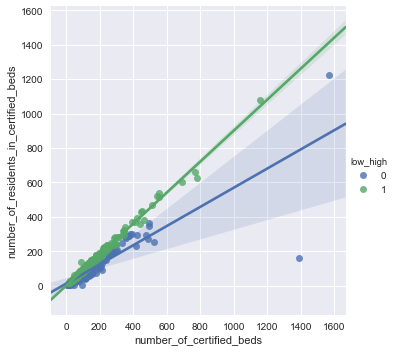

In [29]:



sns.lmplot(
    'number_of_certified_beds',
    'number_of_residents_in_certified_beds',
    data = table_bed_capacity_wo_all,
    hue = 'low_high')

In [ ]:
table_bed_capacity_wo_all['low_high'] = np.where(table_bed_capacity_wo_all.rate >= mean_rate, '1','0')

In [19]:
table_bed_capacity_wo_all.loc[table_bed_capacity_wo_all['rate'] >= mean_rate, 'low_high'] = 1

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [24]:
table_bed_capacity_wo_all['low_high'] = np.where(table_bed_capacity_wo_all.rate >= mean_rate, 1, 0)

C:\Users\Cglan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
